In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
pima = pd.read_csv("C:/Users/Kaushik/Documents/Kaggle Datasets/Machine Learning/Classification Datasets/Diabetes/diabetes.csv", names = col_names)

In [2]:
# Define X and y
feature_cols = ['pregnant','insulin','bmi','age']
X = pima[feature_cols]
y = pima.label

In [3]:
# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, shuffle=True, random_state=0)



In [4]:

# Train a Logistic Regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs').fit(X_train,y_train)

# Decision Tree model
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(X_train, y_train)

#RandomForest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 10 ,n_jobs = 2, random_state=0).fit(X_train, y_train)


In [5]:

# make class predictions for the testing set
y_pred_class_log = logreg.predict(X_test)
y_pred_class_tree = tree_model.predict(X_test)
y_pred_class_rf = rf_model.predict(X_test)
    

In [6]:
#confusion matrix: First arg is True values , Second is Predicted values
metrics.confusion_matrix(y_test,y_pred_class_log)


array([[138,  19],
       [ 53,  21]], dtype=int64)

In [7]:
metrics.confusion_matrix(y_test,y_pred_class_tree)

array([[131,  26],
       [ 41,  33]], dtype=int64)

In [8]:
metrics.confusion_matrix(y_test,y_pred_class_rf)

array([[133,  24],
       [ 43,  31]], dtype=int64)

In [9]:
log_acc = metrics.accuracy_score(y_test,y_pred_class_log)
tree_acc= metrics.accuracy_score(y_test,y_pred_class_tree)
rf_acc = metrics.accuracy_score(y_test,y_pred_class_rf)

In [10]:
print('logisticReg Accuracy = ',log_acc)
print('DTree Accuracy = ',tree_acc)
print('RandomForest Accuracy = ',rf_acc)

logisticReg Accuracy =  0.6883116883116883
DTree Accuracy =  0.70995670995671
RandomForest Accuracy =  0.70995670995671


In [11]:
log_sens = metrics.recall_score(y_test,y_pred_class_log)
tree_sens= metrics.recall_score(y_test,y_pred_class_tree)
rf_sens = metrics.recall_score(y_test,y_pred_class_rf)

In [12]:
print('logisticReg Sensitivity = ',log_sens)
print('DTree Sensitivity = ',tree_sens)
print('RandomForest Sensitivity = ',rf_sens)

logisticReg Sensitivity =  0.28378378378378377
DTree Sensitivity =  0.44594594594594594
RandomForest Sensitivity =  0.4189189189189189


In [13]:
confusion_log = metrics.confusion_matrix(y_test,y_pred_class_log)
confusion_tree = metrics.confusion_matrix(y_test,y_pred_class_tree)
confusion_rf = metrics.confusion_matrix(y_test,y_pred_class_rf)

In [14]:
log_spec = confusion_log[0,0]/(confusion_log[0,0]+confusion_log[0,1])
tree_spec = confusion_tree[0,0]/(confusion_tree[0,0]+confusion_tree[0,1])
rf_spec = confusion_rf[0,0]/(confusion_rf[0,0]+confusion_rf[0,1])

In [15]:
print('logisticReg Specificity = ',log_spec)
print('DTree Specificity = ',tree_spec)
print('RandomForest Specificity = ',rf_spec)

logisticReg Specificity =  0.8789808917197452
DTree Specificity =  0.8343949044585988
RandomForest Specificity =  0.8471337579617835


In [16]:
# After deciding the algo based on sensitivity, We are interested in who ever has diabetes
y_pred_prob_log = logreg.predict_proba(X_test)[:,1]
y_pred_prob_tree = tree_model.predict_proba(X_test)[:,1]
y_pred_prob_rf = rf_model.predict_proba(X_test)[:,1]

Text(0, 0.5, 'Frequency')

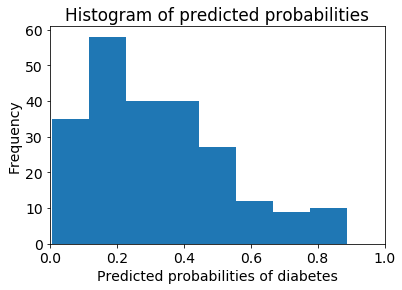

In [17]:
# allow the plots to appear
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14

#histogram of predicted probabilities

plt.hist(y_pred_prob_log,bins = 8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probabilities of diabetes')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

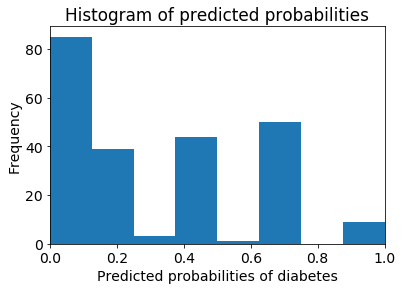

In [18]:
# allow the plots to appear
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14

#histogram of predicted probabilities

plt.hist(y_pred_prob_tree,bins = 8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probabilities of diabetes')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

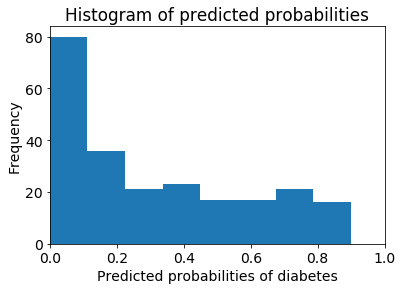

In [19]:
# allow the plots to appear
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14

#histogram of predicted probabilities

plt.hist(y_pred_prob_rf,bins = 8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probabilities of diabetes')
plt.ylabel('Frequency')


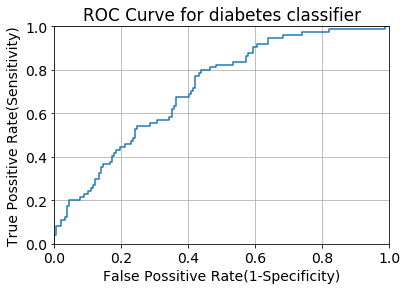

In [20]:
# Plotting ROC Curve

# Important: First val is True value, Second is predicted probabilities
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_prob_log)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for diabetes classifier')
plt.xlabel('False Possitive Rate(1-Specificity)')
plt.ylabel('True Possitive Rate(Sensitivity)')
plt.grid(True)

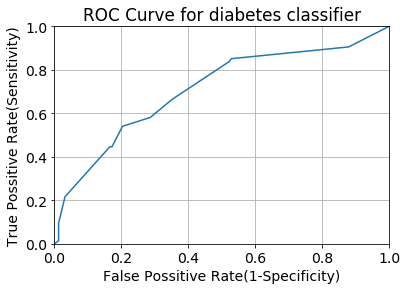

In [21]:
# Important: First val is True value, Second is predicted probabilities
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_prob_tree)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for diabetes classifier')
plt.xlabel('False Possitive Rate(1-Specificity)')
plt.ylabel('True Possitive Rate(Sensitivity)')
plt.grid(True)

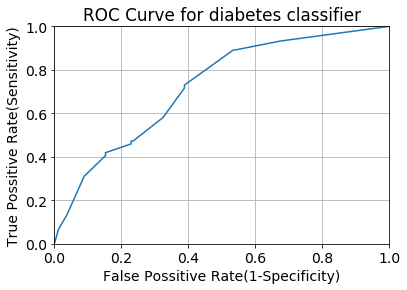

In [22]:
# Important: First val is True value, Second is predicted probabilities
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_prob_rf)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for diabetes classifier')
plt.xlabel('False Possitive Rate(1-Specificity)')
plt.ylabel('True Possitive Rate(Sensitivity)')
plt.grid(True)

In [23]:
# Function that accepts threshold and prints sensitivity and specificity 
def evaluate_threshold(threshold):
    print('Sensitivity', tpr[thresholds> threshold][-1])
    print('Specificity', 1 - fpr[thresholds> threshold][-1])

In [24]:
evaluate_threshold(0.5)

Sensitivity 0.4189189189189189
Specificity 0.8471337579617835


In [25]:
metrics.roc_auc_score(y_test,y_pred_prob_log)

0.7136340161817869

In [26]:
metrics.roc_auc_score(y_test,y_pred_prob_tree)

0.7093303494577379

In [27]:
metrics.roc_auc_score(y_test,y_pred_prob_rf)

0.7224134962988467